# Import Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import Data


### Distance matrix (50 nodes)

In [2]:
# Distance matrix 50 node
df_distance = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet1")
distance = df_distance.iloc[:,1:].to_numpy()
kwargs = {"distance": distance}


# Differential Evolutional Algorithm Parameters

In [40]:
dimensions = len(distance) - 1
maxiters = 4
n_pop = 4
bounds = np.array([[0, 1]] * dimensions)
Mutation_rate = np.array([0.9, 0.5])
Crossover_rate = np.array([0.5, 0.1])

# Differential Evolutional Algorithm


In [41]:
def differential_evolution(
    objective_func,
    bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
):
    # Initialize population
    population = np.random.uniform(
        bounds[:, 0], bounds[:, 1], (population_size, len(bounds))
    )
    global_solution = np.array([])
    Upperbound_Mutation = Mutation_rate[1]
    Lowerbound_Mutation = Mutation_rate[0]
    Upperbound_Crossover_rate = Crossover_rate[1]
    Lowerbound_Crossover_rate = Crossover_rate[0]
    F = Mutation_rate[0]
    CR = Crossover_rate[0]
    for generation in range(max_generations):
        # print(f'Iteration {generation}')
        current_cost = np.array([])
        F += (Upperbound_Mutation - Lowerbound_Mutation) / max_generations
        CR += (Upperbound_Crossover_rate - Lowerbound_Crossover_rate) / max_generations
        for i in range(population_size):
            # Mutation
            indices = [idx for idx in range(population_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = population[i] + F * (b - c)

            # Crossover
            crossover_prob = np.random.rand(len(bounds))
            trial = np.where(crossover_prob < CR, mutant, population[i])

            # Selection
            fitness_trial = objective_func(trial, **kwargs)
            fitness_current = objective_func(population[i], **kwargs)

            if fitness_trial < fitness_current:
                population[i] = trial
                current_cost = np.insert(current_cost, len(current_cost), fitness_trial)
            else:
                current_cost = np.insert(
                    current_cost, len(current_cost), fitness_current
                )
            #print(f"population {i}")
            #print(f"current_cost{current_cost}")
            #print("---------" * 30)
        best_index_plot = current_cost[np.argmin(current_cost)]
        global_solution = np.insert(
            global_solution, len(global_solution), best_index_plot
        )

    # Find the best solution
    best_index = np.argmin(
        [objective_func(individual, **kwargs) for individual in population]
    )
    best_solution = population[best_index]

    return best_solution, global_solution

# Objective Function Evolution


In [ ]:
def objective_func(x, **kwargs):
    """Decoding of each particles for obtaining routing solutions by argsort()"""
    seq = x.argsort() + 1
    """Calculate objective function for obtaining objective value of each particle"""
    j = f_per_particle(seq, **kwargs)
    return np.array(j)


def f_per_particle(m, **kwargs):
    X = m  # Sequence
    obj_val = preserving_strategy(X, **kwargs)  # Call Preserving strategy.
    return obj_val


def preserving_strategy(X, **kwargs):
    # distance matrix
    distance = kwargs["distance"]
    # total distance starts from zero km.
    total_distance = 0
    # Vehicle travel from depot to customer i
    total_distance += distance[0][X[0]]
    # Total distance of routing solution
    for i in range(len(X) - 1):
        total_distance += distance[X[i]][X[i + 1]]
    # Vehicle returns to depot
    total_distance += distance[X[-1]][0]
    # Return total distance (km.) that vehicle traveled
    return total_distance

# Finding Solution


In [43]:
start_algorithm = time.time()
best_solution, global_solution_plot = differential_evolution(
    objective_func,
    bounds=bounds,
    population_size=n_pop,
    max_generations=maxiters,
    Mutation_rate=Mutation_rate,
    Crossover_rate=Crossover_rate,
    **kwargs,
)
End_algorithm = time.time()
run_algorithm = End_algorithm - start_algorithm

[ 0.03610999  0.98451068  0.30929251  0.75273997  1.16228245  0.29938874
  0.02826892  0.67690373  0.98967164  1.1350351   0.2033314   0.9626803
  0.55520493 -0.09313766  0.42723744  0.68584681  0.25714367  1.28188592
  0.32668867  1.60584831  0.99898663  0.20569323  0.50966462  0.90505151
  0.90235996  0.25910636  0.51422813  0.91109474  0.53457023  0.58255205
  0.47599589  0.28813692 -0.14193078  0.77724863  0.38341895  0.40006774
  0.59693671  0.18609967  0.93118457  0.73333743  0.06445128  0.70696756
  0.91425726  0.52525564  1.20282932  0.77122478  0.62042545  1.00295615
  0.14422802]
[0.03610999 0.42938207 0.30929251 0.75273997 0.98848406 0.073172
 0.02826892 0.67690373 0.98967164 0.85115536 0.2033314  0.9626803
 0.55520493 0.28460186 0.65987157 0.66750109 0.25714367 0.66896557
 0.32668867 0.9260668  0.99898663 0.33262764 0.50966462 0.90505151
 0.90235996 0.25910636 0.51422813 0.91109474 0.75346845 0.58255205
 0.47599589 0.87135086 0.16971604 0.77724863 0.38341895 0.28882924
 0.5

# Solution


In [7]:
best_solution

array([-2.18301051e+01,  5.02619274e+00,  1.08059655e+01,  1.51792618e+01,
       -8.31202058e+03, -2.02352977e+04, -1.01005021e+03, -2.93526018e+03,
       -2.43901199e+03, -2.13175420e+02,  1.56935965e+03, -3.28665605e+02,
        6.26374883e+02, -2.28977449e+02, -3.12068652e+02, -1.64859857e+02,
       -1.69342620e+02, -1.01488871e+02, -3.07722980e+01, -6.29590101e+01,
       -1.33891592e+01, -7.43541433e+00,  3.99467291e+02, -3.66301656e+00,
        1.10191593e+02,  9.25205458e+01,  3.71406984e+02,  1.95520242e+02,
        1.24230563e+02,  2.70900833e+02,  5.02733014e+02,  2.46913393e+02,
        1.34921912e+02,  2.42408297e+02, -5.87140209e+00,  2.01333107e+02,
       -2.59702322e+00,  6.58297642e+01,  5.93089527e+01,  5.55562500e+01,
        4.26066609e+00,  2.10233191e+02,  4.40868954e+01,  3.54810348e+01,
        7.49720084e+01,  5.87136491e+01,  6.84582619e+00,  3.34700926e+01,
        2.68022344e+01])

In [8]:
routing = best_solution.argsort() + 1
routing = np.insert(routing, len(routing), 0)
routing = np.insert(routing, 0, 0)
print(f" Routing: {routing}")

 Routing: [ 0  6  5  8  9  7 12 15 14 10 17 16 18 20 19  1 21 22 35 24 37 41  2 47
  3  4 49 48 44 43 40 46 39 38 45 26 25 29 33 28 36 42 34 32 30 27 23 31
 13 11  0]


In [11]:
print(f" Total distance {preserving_strategy(routing[1:-1], **kwargs)} KM.")

 Total distance 1577.3639999999998 KM.


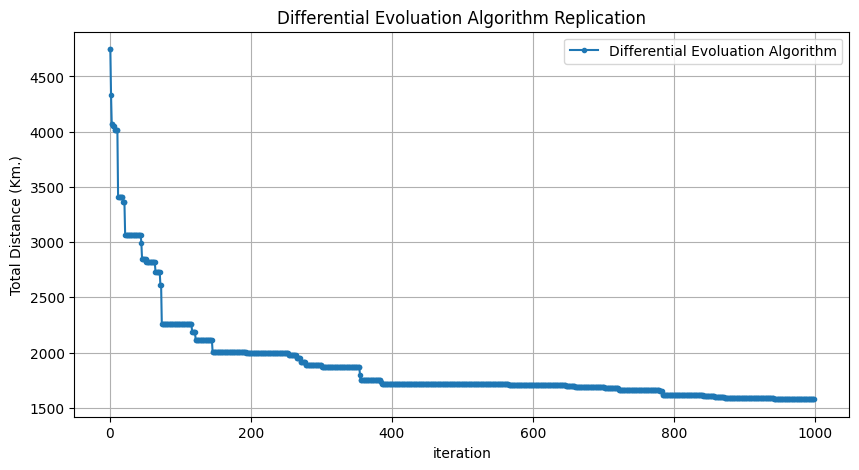

In [12]:
Replication = [i for i in range(len(global_solution_plot))]
y1 = global_solution_plot.tolist()
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(Replication, y1, marker=".", label="Differential Evoluation Algorithm")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title="Differential Evoluation Algorithm Replication",
)
ax.grid()
ax.legend()
plt.show()

# Folium 

In [13]:
import folium

In [14]:
# lattitude and longtitude
df_position = pd.read_excel(r'C:\rl-meta-test\src\Source\VRP_50_node.xlsx', sheet_name="Sheet2")
df_position


,Unnamed: 0,Latitude,Longitude
0,Node1,16.692034,98.519306
1,Node2,17.007926,99.823334
2,Node3,16.833256,100.404008
3,Node4,16.450952,102.749376
4,Node5,16.410365,103.460128
5,Node6,16.602112,104.726311
6,Node7,16.709207,98.550185
7,Node8,16.726069,98.569650
8,Node9,16.722992,98.586170
9,Node10,16.724974,98.594656


In [15]:
data_position = df_position[['Latitude', 'Longitude']].values
position_list = [tuple(coord) for coord in data_position]
position_list

[(np.float64(16.6920339106944), np.float64(98.519305689798)),
 (np.float64(17.0079260927053), np.float64(99.8233342169703)),
 (np.float64(16.8332555318513), np.float64(100.404008244134)),
 (np.float64(16.450951691258), np.float64(102.74937628813)),
 (np.float64(16.410364693011), np.float64(103.460127688226)),
 (np.float64(16.6021119596287), np.float64(104.726311264602)),
 (np.float64(16.7092065174695), np.float64(98.5501853866702)),
 (np.float64(16.7260691723623), np.float64(98.5696495076805)),
 (np.float64(16.7229921582403), np.float64(98.5861699348167)),
 (np.float64(16.7249740787871), np.float64(98.594656001605)),
 (np.float64(16.7251117436782), np.float64(98.5957186256136)),
 (np.float64(16.853005762394), np.float64(99.1164400770002)),
 (np.float64(16.8671382317722), np.float64(99.1357845027271)),
 (np.float64(16.8658629979507), np.float64(99.1357849100604)),
 (np.float64(16.8690753898814), np.float64(99.1242384378976)),
 (np.float64(16.8781590738143), np.float64(99.1283644942217))

In [24]:
# ดึงตำแหน่งตามลำดับ routing และสร้างหมุด+เส้นทางด้วย folium
coordinates = [position_list[i] for i in routing]
for j, coord in enumerate(coordinates):
    folium.Marker(location=coord, popup=f'Point {j+1}').add_to(m)
folium.PolyLine(locations=coordinates, color='blue').add_to(m)
m